In [56]:
import pandas as pd
import nltk
import numpy as np
import pickle



In [57]:
def cleanDataset(dataset, columnsToClean, regexList):
    for column in columnsToClean:
        for regex in regexList:
            dataset[column] = removeString(dataset[column], regex)
    return dataset


def removeString(data, regex):
    return data.str.lower().str.replace(regex.lower(), ' ')

In [58]:
def getRegexList():

    regexList = []
    regexList += ['From:(.*)\r\n']  # from line
    regexList += ['Sent:(.*)\r\n']  # sent to line
    regexList += ['Received:(.*)\r\n']  # received data line
    regexList += ['To:(.*)\r\n']  # to line
    regexList += ['CC:(.*)\r\n']  # cc line
    regexList += ['The information(.*)infection']  # footer
    regexList += ['Endava Limited is a company(.*)or omissions']  # footer
    regexList += ['The information in this email is confidential and may be legally(.*)interference if you are not the intended recipient']  # footer
    regexList += ['\[cid:(.*)]']  # images cid
    regexList += ['https?:[^\]\n\r]+']  # https & http
    regexList += ['Subject:']
    regexList += ['^[_a-z0-9-]+(\.[_a-z0-9-]+)*@[a-z0-9-]+(\.[a-z0-9-]+)*(\.[a-z]{2,4})$']
    regexList += ['[\w\d\-\_\.]+ @ [\w\d\-\_\.]+']
    regexList += ['Subject:']
    regexList += ['[^a-zA-Z]']
    return regexList

In [59]:
columnsToClean = ['Short description']

In [75]:
dfTickets = pd.read_csv('Userreport.csv',encoding='cp1252',index_col ='Number' )

In [138]:
cleanDataset(dfTickets, columnsToClean, getRegexList())

,Short description,Assignment group,Close notes,Tags,Classification
Number,,,,,
INC3860455,sas permission issue in bi layer production a...,AZTEC.GAP.PAAS-SAS-CL-2ND,Issue Description: SAS Permission issue in BI ...,AZ Technology,SAS Server Issue
INC3800702,sas eg error workspace server failure,AZTEC.GAP.PAAS-SAS-CL-2ND,IT: Access Issue.\nD: SAS EG error | workspace...,AZ Reinsurance,SAS Platform Access/Availability
INC4789792,extend technical users,AZTEC.GAP.PAAS-SAS-CL-2ND,Issue Description:Extend Technical Users\nType...,AZ Technology,SAS Access Issue
INC3308102,request for information regarding jobs,AZTEC.GAP.PAAS-SAS-CL-2ND,REQ0807777,AZ Technology,SAS Service Requests
INC4216556,datenrestore sas bi paas deutschland,AZTEC.GAP.PAAS-SAS-CL-2ND,Description : Data restore\nType : Service re...,AZ Germany,SAS Service Requests
INC3441209,warning cpu utilization on server kfrar i...,AZTEC.GAP.PAAS-SAS-CL-2ND,We have killed the top running process and now...,AZ Technology,SAS CPU
INC3341571,cpu utilization on server kfrar is,AZTEC.GAP.PAAS-SAS-CL-2ND,"Dear Team,\n\nIssue is no more exists, So we'r...",AZ Germany,SAS CPU
INC3244300,unable to save anything on the platform or to ...,AZTEC.GAP.PAAS-SAS-CL-2ND,The issue has been resolved,AZ Technology,SAS Filesystem/Quota
INC3734144,users have been removed from the group belomcl...,AZTEC.GAP.PAAS-SAS-CL-2ND,Incident Type ; Access issue\nResolution : adv...,AZ Benelux,SAS Access Issue


In [139]:
dfTickets.groupby('Classification').describe()

Assignment group         \
                                             count unique   
Classification                                              
 SAS  Configuration                              8      1   
 SAS -   UC4  Job Issues                        28      3   
 SAS - Space Issue                              12      1   
 SAS - library creation                          1      1   
 SAS -Memory                                     1      1   
 SAS AVC Client Issue                           90      2   
 SAS Access Issue                              256      5   
 SAS Backup                                     15      1   
 SAS CPU                                         3      1   
 SAS Database                                   57      3   
 SAS Filesystem/Quota                           40      2   
 SAS GPFS                                       23      1   
 SAS Grafana Alert                               7      1   
 SAS LSF                                         6      2   
 SAS Linux Server                               12      2   
 SAS Memory                                      2      1   
 SAS Network Issue                              11      1   
 SAS Others                                    131      5   
 SAS Performance                                72      2   
 SAS Platform Access/Availability              125      2   
 SAS Portal issue                               35      2   
 SAS Server Issue                              148      4   
 SAS Service Requests                          233      4   
 SAS UC4 Job Creation                            4      1   
 SAS- configuration                              1      1   
 sas configuration                              17      1   
SAS Access Issue                                 4      1   
SAS GPFS                                         2      1   
SAS Service Requests                             1      1   

                                                                  Close notes  \
                                                         top freq       count   
Classification                                                                  
 SAS  Configuration                AZTEC.GAP.PAAS-SAS-CL-2ND    8           8   
 SAS -   UC4  Job Issues           AZTEC.GAP.PAAS-SAS-CL-2ND   26          28   
 SAS - Space Issue                 AZTEC.GAP.PAAS-SAS-CL-2ND   12          12   
 SAS - library creation            AZTEC.GAP.PAAS-SAS-CL-2ND    1           1   
 SAS -Memory                       AZTEC.GAP.PAAS-SAS-CL-2ND    1           1   
 SAS AVC Client Issue              AZTEC.GAP.PAAS-SAS-CL-2ND   85          87   
 SAS Access Issue                  AZTEC.GAP.PAAS-SAS-CL-2ND  249         254   
 SAS Backup                        AZTEC.GAP.PAAS-SAS-CL-2ND   15          15   
 SAS CPU                           AZTEC.GAP.PAAS-SAS-CL-2ND    3           3   
 SAS Database                      AZTEC.GAP.PAAS-SAS-CL-2ND   55          56   
 SAS Filesystem/Quota              AZTEC.GAP.PAAS-SAS-CL-2ND   39          40   
 SAS GPFS                          AZTEC.GAP.PAAS-SAS-CL-2ND   23          23   
 SAS Grafana Alert                 AZTEC.GAP.PAAS-SAS-CL-2ND    7           7   
 SAS LSF                           AZTEC.GAP.PAAS-SAS-CL-2ND    5           6   
 SAS Linux Server                  AZTEC.GAP.PAAS-SAS-CL-2ND   11          12   
 SAS Memory                        AZTEC.GAP.PAAS-SAS-CL-2ND    2           2   
 SAS Network Issue                 AZTEC.GAP.PAAS-SAS-CL-2ND   11          11   
 SAS Others                        AZTEC.GAP.PAAS-SAS-CL-2ND  123         130   
 SAS Performance                   AZTEC.GAP.PAAS-SAS-CL-2ND   71          72   
 SAS Platform Access/Availability  AZTEC.GAP.PAAS-SAS-CL-2ND  124         125   
 SAS Portal issue                  AZTEC.GAP.PAAS-SAS-CL-2ND   34          35   
 SAS Server Issue                  AZTEC.GAP.PAAS-SAS-CL-2ND  137         148   
 SAS Service Requests              AZTEC.GAP.PAAS-SAS-CL

In [241]:
list = [' SAS Filesystem/Quota',' SAS Service Requests',' SAS Configuration',' SAS - UC4 Job Issues',' SAS AVC Client Issue',' SAS Access Issue',' SAS Backup',' SAS Database',' SAS GPFS',' SAS Linux Server',' SAS Network Issue',' SAS Performance',' SAS Platform Access/Availability',' SAS Portal issue',' SAS Service Requests',' SAS Server Issue',' SAS Service Requests',' sas configuration']

In [242]:
dfTickets = dfTickets.loc[dfTickets['Classification'].isin(list)]

In [243]:
dfTickets.groupby('Classification').describe()

length                                     \
                                   count       mean        std   min    25%   
Classification                                                                
 SAS AVC Client Issue               90.0  49.000000  19.646883   8.0  30.25   
 SAS Access Issue                  256.0  37.632812  19.455075   9.0  23.00   
 SAS Backup                         15.0  56.533333  18.212502  27.0  41.50   
 SAS Database                       57.0  48.526316  26.728199  12.0  27.00   
 SAS Filesystem/Quota               40.0  40.175000  21.774941   7.0  22.00   
 SAS GPFS                           23.0  39.086957  21.202301  13.0  30.00   
 SAS Linux Server                   12.0  34.666667  18.297210  16.0  23.50   
 SAS Network Issue                  11.0  51.090909  25.414384  18.0  34.50   
 SAS Performance                    72.0  40.875000  24.067942   9.0  26.00   
 SAS Platform Access/Availability  125.0  39.960000  16.578941  18.0  28.00   
 SAS Portal issue                   35.0  33.857143  18.280724  12.0  20.50   
 SAS Server Issue                  148.0  41.020270  22.035676  11.0  24.00   
 SAS Service Requests              233.0  35.613734  21.818337   6.0  21.00   
 sas configuration                  17.0  50.176471  27.320403  22.0  32.00   

                                                       
                                    50%    75%    max  
Classification                                         
 SAS AVC Client Issue              51.5  65.00   90.0  
 SAS Access Issue                  32.0  46.00  149.0  
 SAS Backup                        60.0  70.00   84.0  
 SAS Database                      48.0  58.00  121.0  
 SAS Filesystem/Quota              35.0  58.25   95.0  
 SAS GPFS                          34.0  43.50  110.0  
 SAS Linux Server                  29.0  42.75   80.0  
 SAS Network Issue                 49.0  64.50  101.0  
 SAS Performance                   32.5  51.25  153.0  
 SAS Platform Access/Availability  35.0  49.00   88.0  
 SAS Portal issue                  29.0  42.00   80.0  
 SAS Server Issue                  36.0  51.00  143.0  
 SAS Service Requests              27.0  43.00  133.0  
 sas configuration                 45.0  57.00  137.0

In [244]:
dfTickets['length'] = dfTickets['Short description'].apply(len)
dfTickets.head()

,Short description,Assignment group,Close notes,Tags,Classification,length
Number,,,,,,
INC3860455,sas permission issue in bi layer production a...,AZTEC.GAP.PAAS-SAS-CL-2ND,Issue Description: SAS Permission issue in BI ...,AZ Technology,SAS Server Issue,83
INC3800702,sas eg error workspace server failure,AZTEC.GAP.PAAS-SAS-CL-2ND,IT: Access Issue.\nD: SAS EG error | workspace...,AZ Reinsurance,SAS Platform Access/Availability,40
INC4789792,extend technical users,AZTEC.GAP.PAAS-SAS-CL-2ND,Issue Description:Extend Technical Users\nType...,AZ Technology,SAS Access Issue,22
INC3308102,request for information regarding jobs,AZTEC.GAP.PAAS-SAS-CL-2ND,REQ0807777,AZ Technology,SAS Service Requests,38
INC4216556,datenrestore sas bi paas deutschland,AZTEC.GAP.PAAS-SAS-CL-2ND,Description : Data restore\nType : Service re...,AZ Germany,SAS Service Requests,39


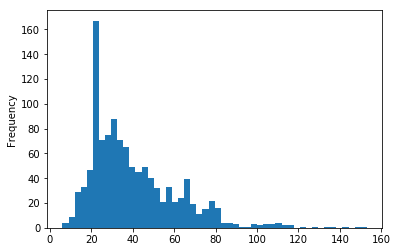

In [245]:
dfTickets['length'].plot(bins=50, kind='hist') 

In [246]:
from nltk.corpus import stopwords

In [247]:
import string
def text_process(mess):
    """
    1. Remove all stopwords
    2. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [248]:
dfTickets['Short description'].apply(text_process)

Number
INC3860455    [sas, permission, issue, bi, layer, production...
INC3800702         [sas, eg, error, workspace, server, failure]
INC4789792                           [extend, technical, users]
INC3308102              [request, information, regarding, jobs]
INC4216556           [datenrestore, sas, bi, paas, deutschland]
INC3244300     [unable, save, anything, platform, run, batches]
INC3734144        [users, removed, group, belomclosing, urgent]
INC4071670        [kfrar, tsm, backup, status, jan, pm, failed]
INC2756752                 [increase, quota, per, attached, sr]
INC4148114                                      [quota, change]
INC4156870                                  [eds, mounted, sla]
INC2831550    [service, request, information, jobs, correspo...
INC4701224                        [unable, login, sas, servers]
INC3127945                       [pa, able, login, server, sla]
INC4203040           [datenrestore, sas, bi, paas, deutschland]
INC3231803                       

In [249]:
from sklearn.feature_extraction.text import CountVectorizer# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(dfTickets['Short description'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

1184


In [250]:
dfTickets4 = dfTickets['Short description'][3]
print(dfTickets4)
bow4 = bow_transformer.transform([dfTickets4])
print(bow4)
print(bow4.shape)

request for information regarding jobs
  (0, 549)	1
  (0, 575)	1
  (0, 862)	1
  (0, 883)	1
(1, 1184)


In [251]:
dfTickets_bow = bow_transformer.transform(dfTickets['Short description'])

In [252]:
print('Shape of Sparse Matrix: ', dfTickets_bow.shape)
print('Amount of Non-Zero occurences: ', dfTickets_bow.nnz)

Shape of Sparse Matrix:  (1134, 1184)
Amount of Non-Zero occurences:  5852


In [253]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(dfTickets_bow)

In [254]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['sas']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['failure']])

1.6559617462639165
6.242628460687448


In [255]:
messages_tfidf = tfidf_transformer.transform(dfTickets_bow)
print(dfTickets_bow.shape)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

(1134, 1184)
  (0, 883)	0.3181850053591488
  (0, 862)	0.6460633810229187
  (0, 575)	0.40206265890608966
  (0, 549)	0.5654255285881586


In [256]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, dfTickets['Short description'])

In [257]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', dfTickets.Classification[3])

predicted: service request  fmo 
expected:  SAS Service Requests


In [258]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['win     sas anwendungen' 'win     sas anwendungen'
 'win     sas anwendungen' ... 'win     sas anwendungen'
 'win     sas anwendungen' 'win     sas anwendungen']


In [259]:
from sklearn.metrics import classification_report
print (classification_report(dfTickets['Short description'], all_predictions))

                                                                                                                                                           precision    recall  f1-score   support

                                                                                                                     not found    sas bifi platform   eg        0.00      0.00      0.00         1
                                                  not found   changing of the ownership for all the tables in the following folders from x flor to azbnlp       0.00      0.00      0.00         1
                                                                                                                            not found sas dev environment       0.00      0.00      0.00         1
                                                                                                                             sas server  access to files        0.00      0.00      0.00         1
                        

X:\Software\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [260]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(dfTickets['Short description'], dfTickets['Classification'], test_size=0.3)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

793 341 1134


In [281]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [262]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x00000260982A9D08>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [263]:
predictions = pipeline.predict(msg_test)

In [264]:
print(classification_report(predictions,label_test))

                                   precision    recall  f1-score   support

             SAS AVC Client Issue       0.12      0.60      0.21         5
                 SAS Access Issue       0.89      0.40      0.55       164
                       SAS Backup       0.33      1.00      0.50         1
                     SAS Database       0.12      1.00      0.21         2
             SAS Filesystem/Quota       0.00      0.00      0.00         0
                         SAS GPFS       0.00      0.00      0.00         0
                 SAS Linux Server       0.00      0.00      0.00         0
                SAS Network Issue       0.00      0.00      0.00         0
                  SAS Performance       0.00      0.00      0.00         0
 SAS Platform Access/Availability       0.05      0.18      0.08        11
                 SAS Portal issue       0.00      0.00      0.00         0
                 SAS Server Issue       0.49      0.35      0.41        54
             SAS Service

X:\Software\anaconda\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [270]:
 parameters = {'vect__ngram_range': [(1, 1), (1, 2)],'tfidf__use_idf': (True, False),'clf__alpha': (1e-2, 1e-3)}

In [ ]:
pipeline = Pipeline([
        ('bow', CountVectorizer(analyzer=text_process)),
        ('tfidf', TfidfTransformer()),
        ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline = pipeline.fit(msg_train, label_train)

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
gs_clf = GridSearchCV(pipeline, parameters, n_jobs=-1)

gs_clf = gs_clf.fit(msg_train, label_train)

In [ ]:

gs_clf.best_score_

gs_clf.best_params_
print("Evaluating model")